In [1]:
import pandas as pd
import time
import numpy as np
from heavy_tail_observations import BothSideWeibullNoise, BothSideParetoNoise, BothSideFrechetNoise
from heavy_tail_lin_bandit import MENU, TOFU, SupHvyLinBandit

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#import of rating data
df_rating = pd.read_csv("Ratings.csv")

#import of bookdata
df_book = pd.read_csv("Books.csv", low_memory=False)
for i in range(len(df_book['Year-Of-Publication'])):
    if df_book['Year-Of-Publication'][i][0] >='0' and df_book['Year-Of-Publication'][i][0] <= '9':
        continue
    else:
        df_book['Year-Of-Publication'][i] = 0 
df_book['year'] = pd.to_numeric(df_book['Year-Of-Publication'])

#import of user data
df_user = pd.read_csv("Users.csv")

#frequency binning the ages into age groups as it will be easier for future analysis
# df_user['age_group'] = pd.qcut(df_user['Age'],q=10,precision=0)
df_book['year_group'] = pd.qcut(df_book['year'],q=10,precision=0)

#join all three dataframes
df = pd.merge(df_rating, df_book, on='ISBN')
# df = pd.merge(df_rating, df_book, how='left', on='ISBN')
# df = pd.merge(df, df_user, on="User-ID")

# check for null valuesrating
df = df.dropna(axis=0)
df.isnull().sum()

book_counts = pd.DataFrame(df["Book-Title"].value_counts())
book_counts.sort_values("Book-Title", ascending=False)
rare_book = book_counts[book_counts["Book-Title"] <= 100].index
common_book = df[~df["Book-Title"].isin(rare_book)]
df = common_book

#drop unneccessary features
df.drop(["Image-URL-S", "Image-URL-M", "Image-URL-L", "ISBN", "Book-Title", "Year-Of-Publication", "year"], axis=1, inplace=True)

#categorize age_group, gender and occupation using 1-hot encoder
df['year_group'] = pd.Categorical(df['year_group'])
df['Book-Author'] = pd.Categorical(df['Book-Author'])
#df['Publisher'] = pd.Categorical(df['Publisher'])

year_group_dummies = pd.get_dummies(df['year_group'])
author_dummies = pd.get_dummies(df['Book-Author'], sparse=True)
#publisher_dummies = pd.get_dummies(df['Publisher'], sparse=True)

df = pd.concat([df, year_group_dummies, author_dummies], axis=1)

df.drop(['Book-Author', 'Publisher', 'year_group', 'User-ID'], axis=1, inplace=True)
df.head()

,Book-Rating,"(-1.0, 1982.0]","(1982.0, 1987.0]","(1987.0, 1990.0]","(1990.0, 1993.0]","(1993.0, 1995.0]","(1995.0, 1997.0]","(1997.0, 1999.0]","(1999.0, 2001.0]","(2001.0, 2002.0]",...,William Gibson,William Golding,William W. Johnstone,William X. Kienzle,Wilson Rawls,Winston Groom,Yann Martel,Yann Queffelec,Zachary Alan Fox,Zadie Smith
62,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
65,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
66,10,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
y = df['Book-Rating'].to_numpy()
X = df.drop('Book-Rating',axis=1,).to_numpy()
dim = X.shape[1]
total_samples = len(y)

T = 9621
K = int(total_samples/T)

p=1.5
S = 1.

D = np.reshape(X, (T,K,dim))
R = np.reshape(y, (T,K))

In [4]:
get_mean = lambda x, y: R[y]
get_observation = lambda x, y, z: R[y][z]

In [7]:
# error_list, theta_star = MENU(D, get_mean, get_observation, S=S, lamb=1., delta=0.01, p=p, c=1.)
error_list, theta_star = TOFU(D, get_mean, get_observation, S=S, lamb=1., delta=0.01, p=p, b=1.)
# error_list, pro_estimator = SupHvyLinBandit(D, get_mean, get_observation, method="proof", S=S, lamb=1., delta=0.001, nu = 1e-4, p=p)
# error_list, btc_estimator = SupHvyLinBandit(D, get_mean, get_observation, method="btc", S=S, lamb=1., delta=0.001, nu = 1., p=p)
# error_list, bmm_estimator = SupHvyLinBandit(D, get_mean, get_observation, method="bmm", S=S, lamb=1., delta=0.001, nu = 1., p=p)

KeyboardInterrupt: 

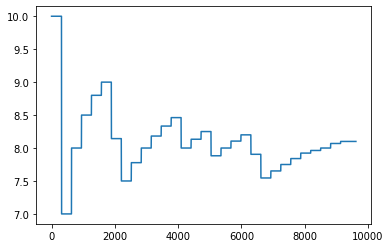

In [6]:
plt.plot(error_list)